In [1]:
from tensorflow import keras

In [2]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

In [3]:
train_scaled1 = train_input.reshape(-1, 28, 28, 1)/ 255.0

In [4]:
train_scaled1.shape

(60000, 28, 28, 1)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled1, train_target, test_size=0.2,  random_state=42)

In [7]:
train_scaled.shape

(48000, 28, 28, 1)

In [8]:
model = keras.Sequential()

In [9]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                             padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                             padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

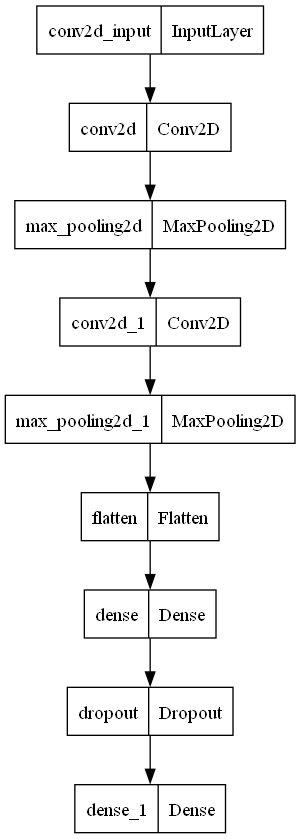

In [11]:
keras.utils.plot_model(model)

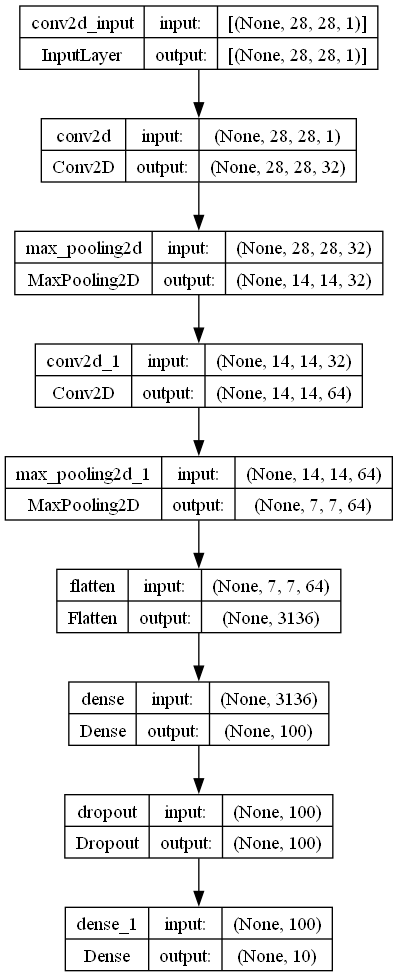

In [12]:
keras.utils.plot_model(model, show_shapes=True)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 33s 21ms/step - loss: 0.5163 - accuracy: 0.8141 - val_loss: 0.3334 - val_accuracy: 0.8791
Epoch 2/20
   7/1500 [..............................] - ETA: 32s - loss: 0.3662 - accuracy: 0.8438

C:\Users\bbong\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 34s 23ms/step - loss: 0.3415 - accuracy: 0.8775 - val_loss: 0.2956 - val_accuracy: 0.8868
Epoch 3/20
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2897 - accuracy: 0.8957 - val_loss: 0.2468 - val_accuracy: 0.9084
Epoch 4/20
1500/1500 [==============================] - 38s 26ms/step - loss: 0.2593 - accuracy: 0.9057 - val_loss: 0.2442 - val_accuracy: 0.9118
Epoch 5/20
1500/1500 [==============================] - 34s 22ms/step - loss: 0.2358 - accuracy: 0.9137 - val_loss: 0.2618 - val_accuracy: 0.9053
Epoch 6/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2174 - accuracy: 0.9202 - val_loss: 0.2136 - val_accuracy: 0.9227
Epoch 7/20
1500/1500 [==============================] - 31s 20ms/step - loss: 0.2006 - accuracy: 0.9252 - val_loss: 0.2178 - val_accuracy: 0.9205
Epoch 8/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1855 - accuracy: 0.9318 - val_loss: 0.2126 - val_accura

In [14]:
model = keras.models.load_model('best-cnn-model.h5')

In [15]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2126 - accuracy: 0.9215


[0.21256572008132935, 0.921500027179718]

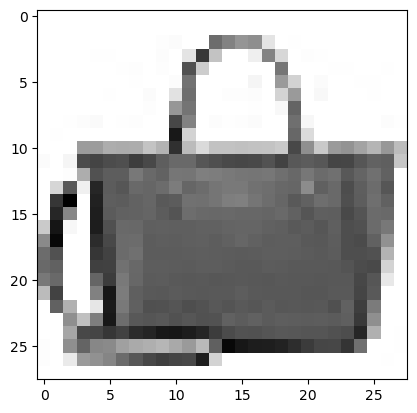

In [16]:
import matplotlib.pyplot as plt
plt.imshow(val_scaled[0].reshape(28, 28), cmap = 'gray_r')
plt.show()

In [17]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 108ms/step
[[5.0860602e-14 1.2747979e-20 3.4741103e-15 5.1021992e-14 1.1702083e-13
  2.2678917e-13 1.2233243e-12 9.9951997e-15 1.0000000e+00 3.9753021e-14]]


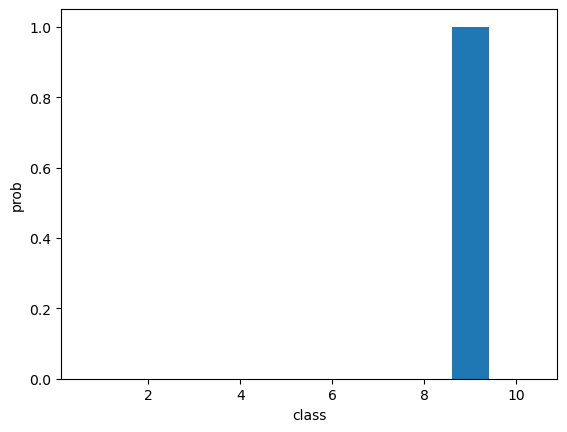

In [18]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [19]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [21]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [22]:
test_scaled = test_input.reshape(-1, 28, 28, 1)/ 255.0

In [23]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2311 - accuracy: 0.9174


[0.23112104833126068, 0.9174000024795532]

In [24]:
model.layers

In [25]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [26]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.024679068 0.24900666


Text(0, 0.5, 'count')

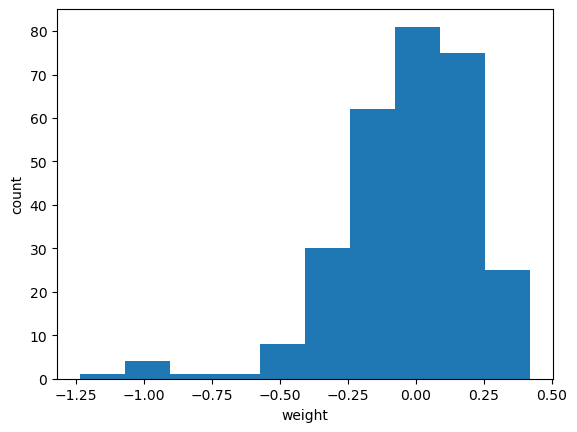

In [27]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')

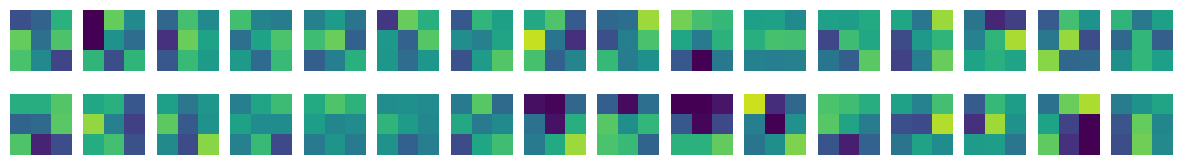

In [29]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i*16+j], vmin=-0.5, vmax = 0.5)
        axs[i, j].axis('off')
plt.show()

In [30]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same',
                                          input_shape=(28, 28, 1)))

In [31]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [32]:
no_training_weights = no_training_conv.weights[0].numpy()

In [33]:
print(no_training_weights.mean(), no_training_weights.std())

0.0047271233 0.0852862


Text(0, 0.5, 'count')

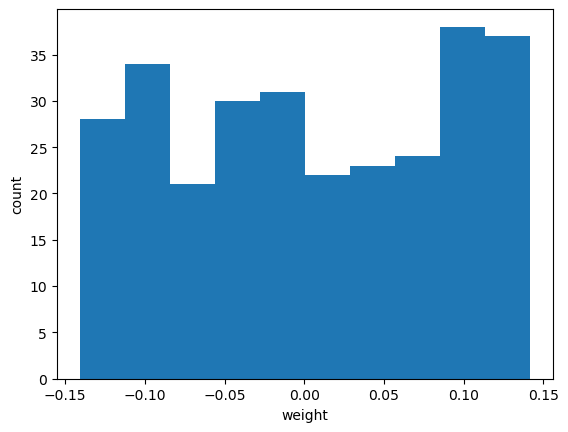

In [34]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')

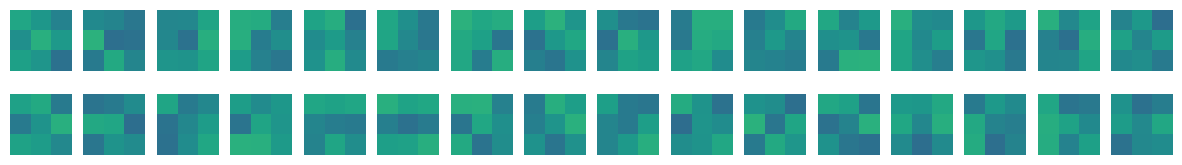

In [35]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i*16+j], vmin=-0.5, vmax = 0.5)
        axs[i, j].axis('off')
plt.show()

In [36]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [37]:
conv_acti = keras.Model(model.input, model.layers[0].output)

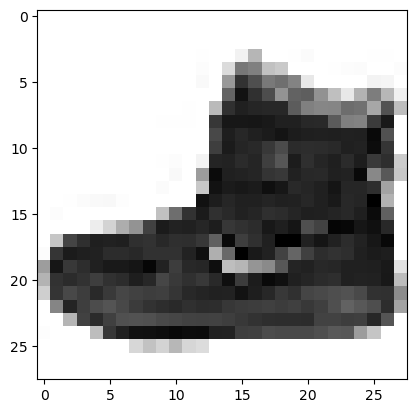

In [38]:
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [39]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 46ms/step


In [40]:
print(feature_maps.shape)

(1, 28, 28, 32)


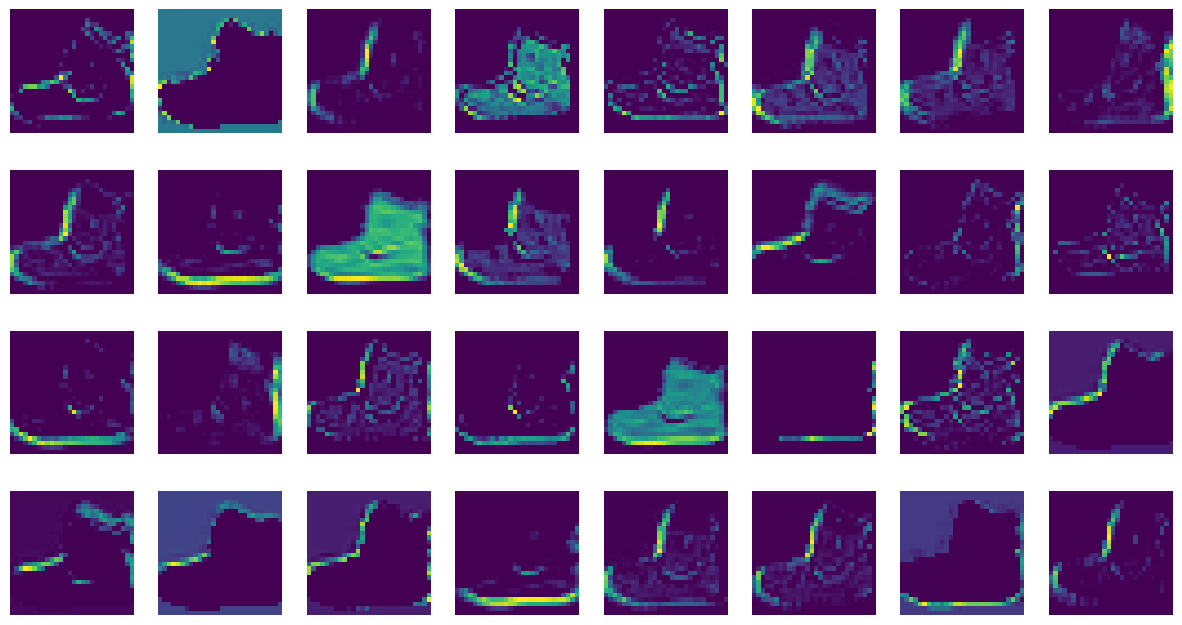

In [41]:
fig, axs = plt.subplots(4, 8, figsize = (15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
        axs[i, j].axis('off')
plt.show()

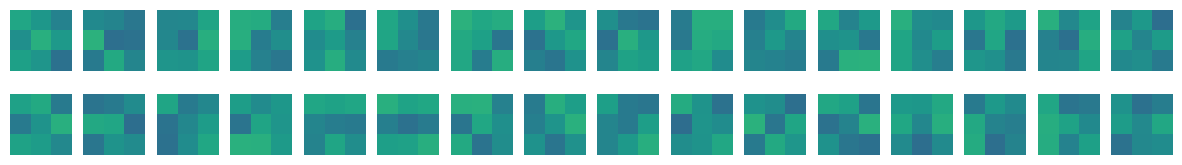

In [42]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i*16+j], vmin=-0.5, vmax = 0.5)
        axs[i, j].axis('off')
plt.show()

In [43]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 53ms/step


In [44]:
print(feature_maps.shape)

(1, 14, 14, 64)


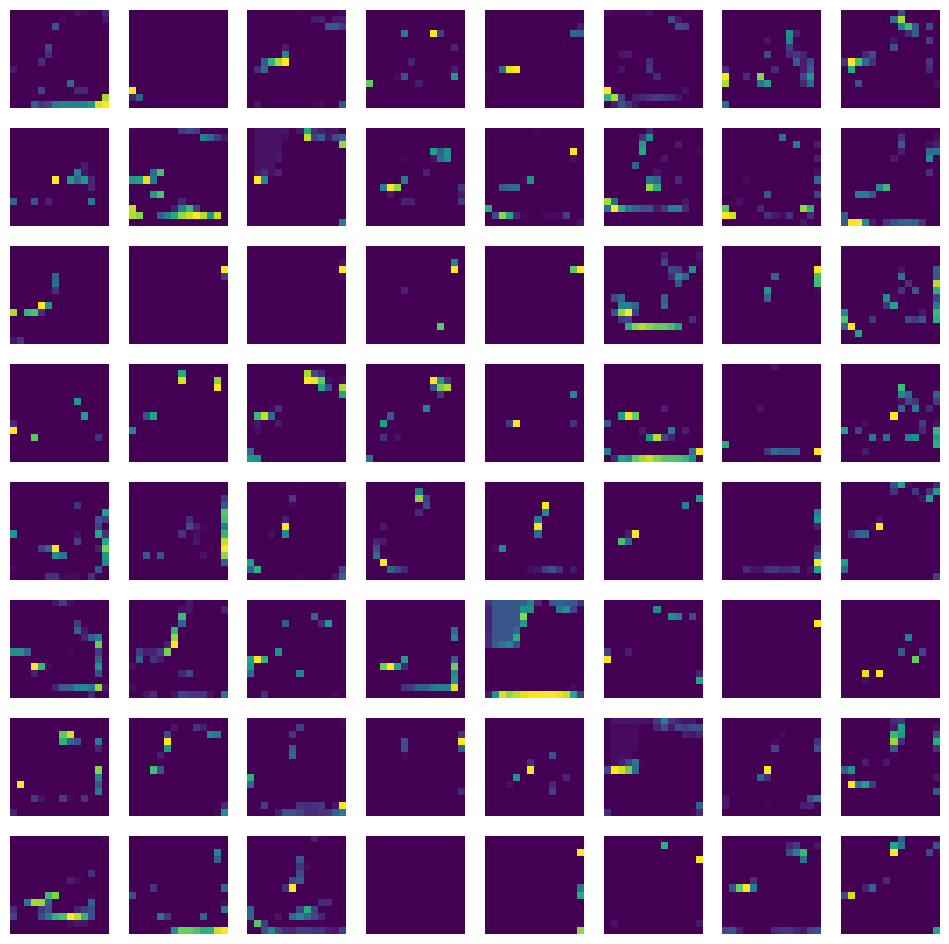

In [45]:
fig, axs = plt.subplots(8, 8, figsize = (12, 12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
        axs[i, j].axis('off')
plt.show()